In [1]:
# Install Condacolab to integrate Conda with Colab
!pip install -q condacolab

# Import and run Condacolab to enable Conda
import condacolab
condacolab.install()

# Install pmdarima from conda-forge using Conda
!conda install -c conda-forge pmdarima -y

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



### Loading Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/project_dataset.csv", parse_dates=['Date'], index_col="Date")
df.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,0,1.0,24924.50,42.31,2.572,211.096358,8.106
2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
2010-02-05,0,17.0,13223.76,42.31,2.572,211.096358,8.106
2010-02-05,0,45.0,37.44,42.31,2.572,211.096358,8.106
2010-02-05,0,28.0,1085.29,42.31,2.572,211.096358,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10244 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IsHoliday     10244 non-null  int64  
 1   Dept          10244 non-null  float64
 2   Weekly_Sales  10244 non-null  float64
 3   Temperature   10244 non-null  float64
 4   Fuel_Price    10244 non-null  float64
 5   CPI           10244 non-null  float64
 6   Unemployment  10244 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 640.2 KB


In [4]:
#filter for department 8 data

df = df[df["Dept"]==8]
df.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,0,8.0,40129.01,42.31,2.572,211.096358,8.106
2010-02-12,1,8.0,37334.83,38.51,2.548,211.242170,8.106
2010-02-19,0,8.0,38717.60,39.93,2.514,211.289143,8.106
2010-02-26,0,8.0,35318.20,46.63,2.561,211.319643,8.106
2010-03-05,0,8.0,38776.09,46.50,2.625,211.350143,8.106


In [5]:
df.drop(columns=["Dept"],inplace=True)
df.head()

/tmp/ipython-input-5-4048857764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Dept"],inplace=True)


,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,0,40129.01,42.31,2.572,211.096358,8.106
2010-02-12,1,37334.83,38.51,2.548,211.242170,8.106
2010-02-19,0,38717.60,39.93,2.514,211.289143,8.106
2010-02-26,0,35318.20,46.63,2.561,211.319643,8.106
2010-03-05,0,38776.09,46.50,2.625,211.350143,8.106


In [6]:
df['Target'] = df['Weekly_Sales']
df.head()

/tmp/ipython-input-6-4094410998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Weekly_Sales']


,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Target
Date,,,,,,,
2010-02-05,0,40129.01,42.31,2.572,211.096358,8.106,40129.01
2010-02-12,1,37334.83,38.51,2.548,211.242170,8.106,37334.83
2010-02-19,0,38717.60,39.93,2.514,211.289143,8.106,38717.60
2010-02-26,0,35318.20,46.63,2.561,211.319643,8.106,35318.20
2010-03-05,0,38776.09,46.50,2.625,211.350143,8.106,38776.09


# Time Series Analysis

### Visualize the time series

In [7]:
import matplotlib.pyplot as plt

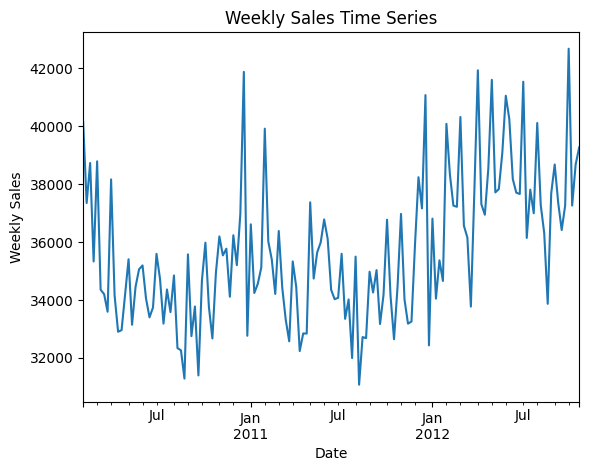

In [8]:
df['Target'].plot()
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Time Series')
plt.show()

### Identify and analyze trends and seasonality

In [9]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

/tmp/ipython-input-10-3961486705.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Target'].resample("M").mean(),


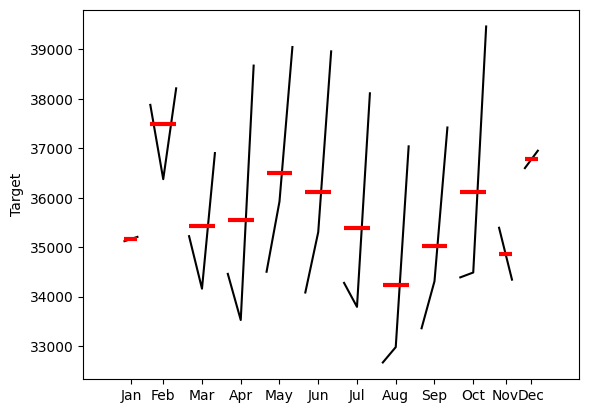

In [10]:
month_plot(df['Target'].resample("M").mean(),
           ylabel = 'Target')
plt.show()

/tmp/ipython-input-11-2498665389.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Target'].resample('Q').mean(),


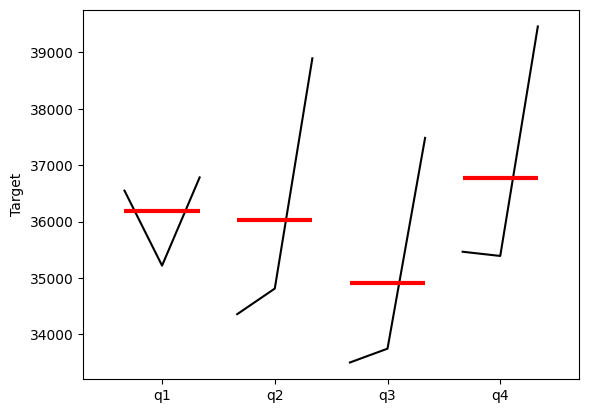

In [11]:
quarter_plot(df['Target'].resample('Q').mean(),
           ylabel = 'Target')
plt.show()

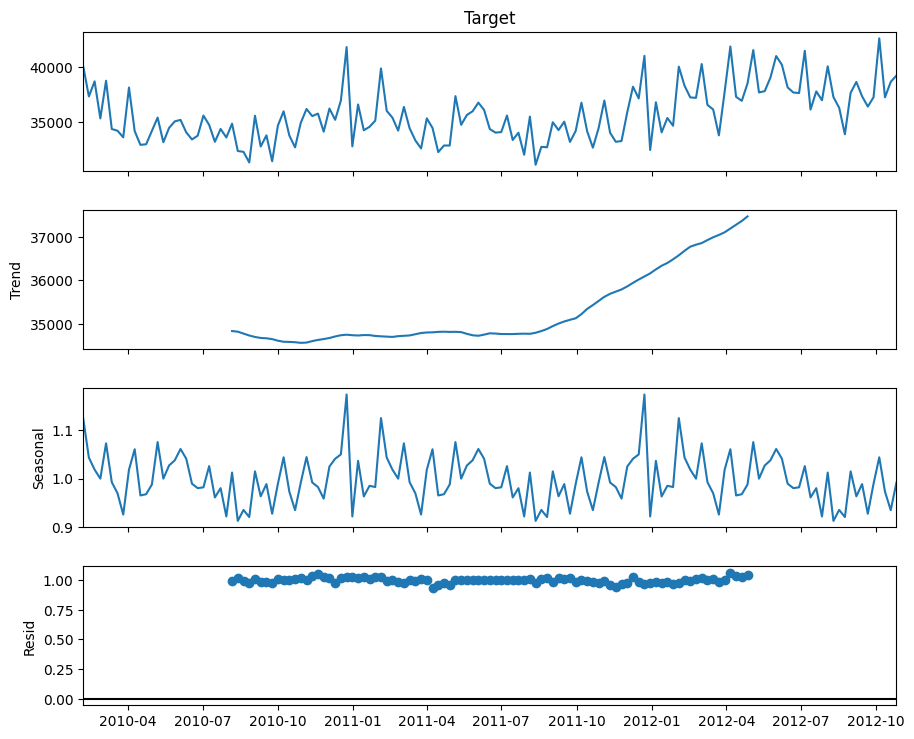

In [12]:
decomposition = seasonal_decompose(df['Target'],
                                   model = 'mul',
                                   period = 52 )
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

### Identify and analyze potential external regressors

In [13]:
from statsmodels.graphics.tsaplots import plot_ccf

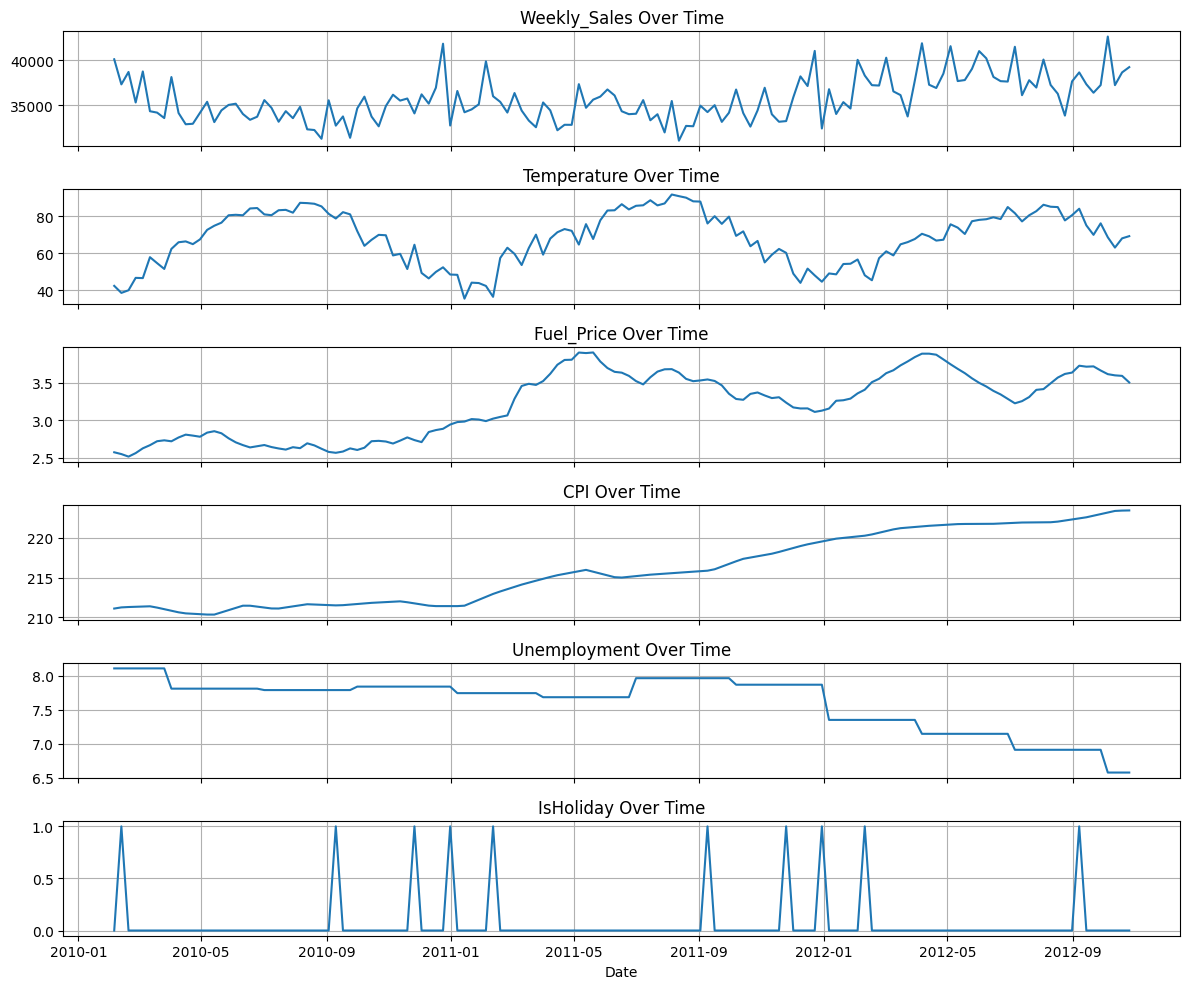

In [14]:
import matplotlib.pyplot as plt

features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 10), sharex=True)

for i, feature in enumerate(features):
    axes[i].plot(df.index, df[feature])
    axes[i].set_title(f'{feature} Over Time')
    axes[i].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


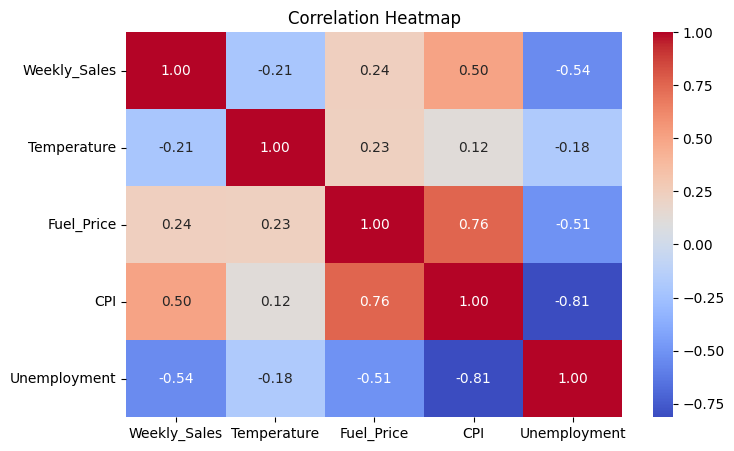

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quick correlation matrix (numerical only)
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x400 with 0 Axes>

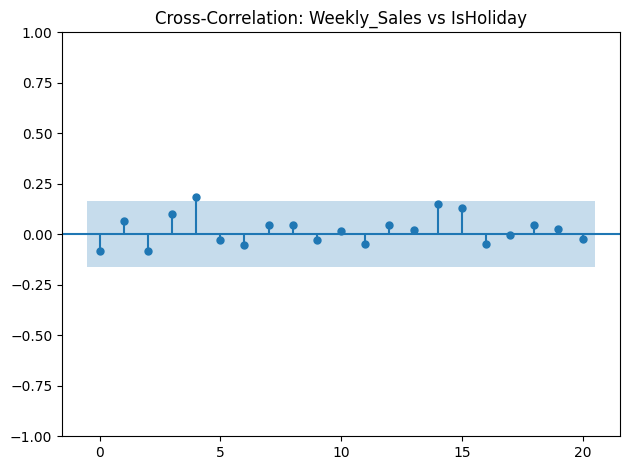

<Figure size 1000x400 with 0 Axes>

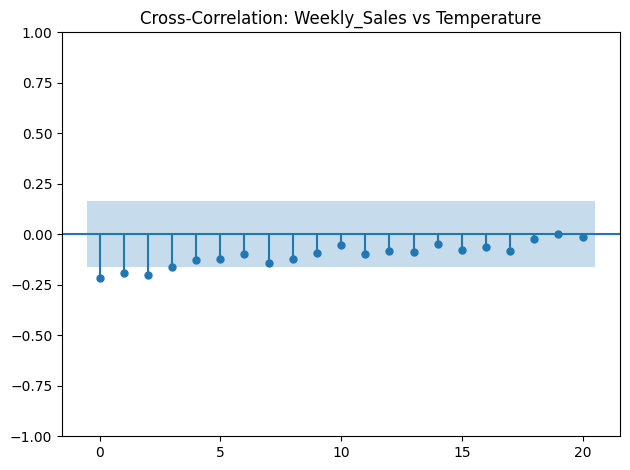

<Figure size 1000x400 with 0 Axes>

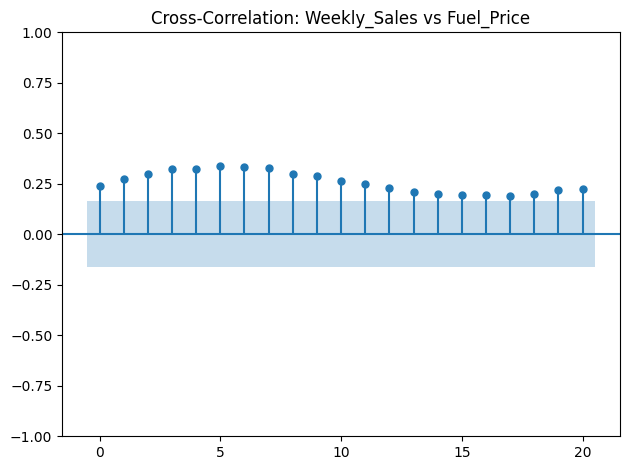

<Figure size 1000x400 with 0 Axes>

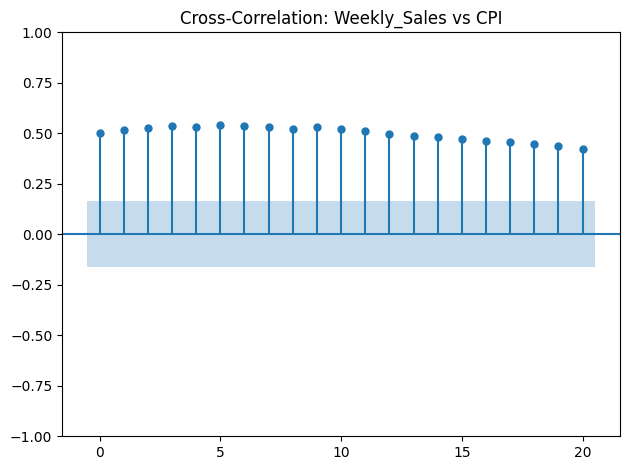

<Figure size 1000x400 with 0 Axes>

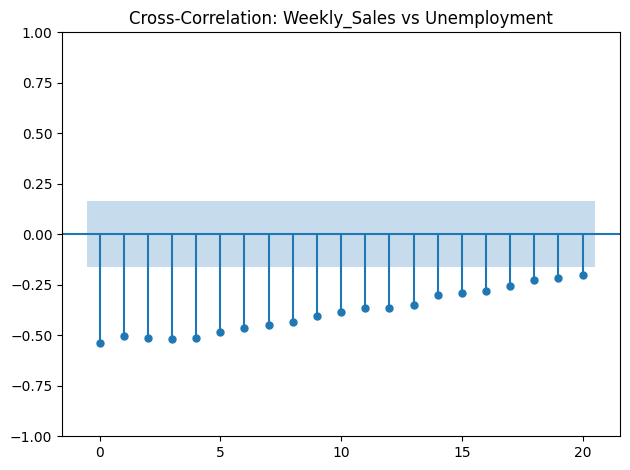

In [16]:
columns_to_check = [col for col in df.columns if col not in ['Weekly_Sales', 'Target']]

for col in columns_to_check:
    plt.figure(figsize=(10, 4))
    plot_ccf(df['Weekly_Sales'].dropna(), df[col].dropna(), lags=20)
    plt.title(f'Cross-Correlation: Weekly_Sales vs {col}')
    plt.tight_layout()
    plt.show()

### Perform ACF/PACF

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

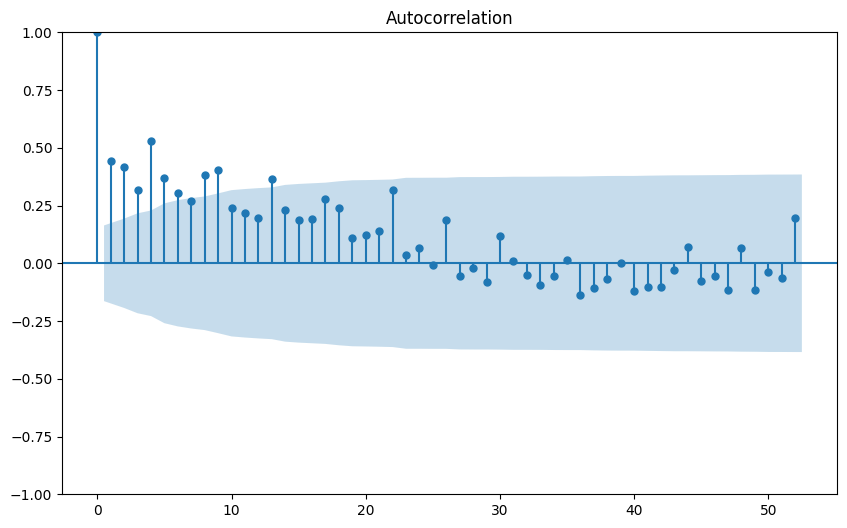

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Target'].dropna(), lags = 52, ax = ax)
plt.show()

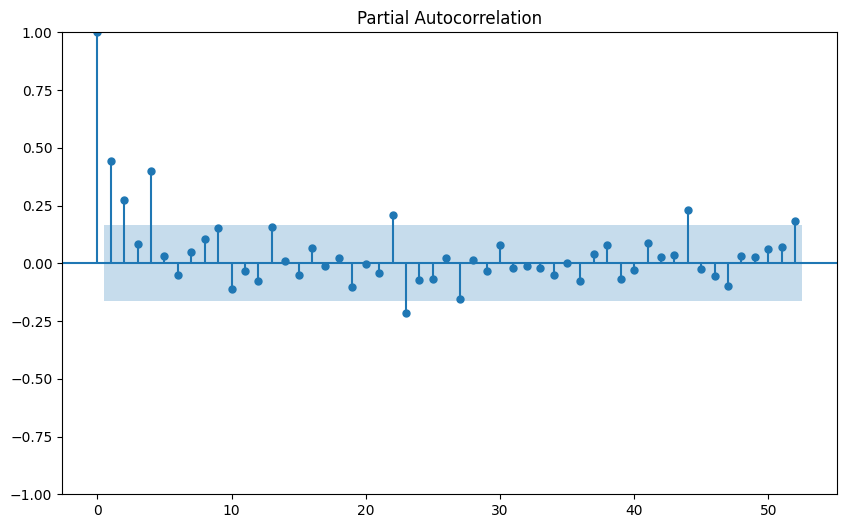

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['Target'].dropna(), lags = 52, ax = ax)
plt.show()

# Exponential Smoothing Family

In [20]:
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [21]:
df.columns

Index(['IsHoliday', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Target'],
      dtype='object')

In [22]:
periods = int(len(df)-52*2.5) #predict next 13 week
train, test = df.iloc[:-periods,:][['Weekly_Sales']], df.iloc[-periods:, : ][['Weekly_Sales']]
test.head()

,Weekly_Sales
Date,
2012-08-03,40098.84
2012-08-10,37269.92
2012-08-17,36294.18
2012-08-24,33855.28
2012-08-31,37666.92


 Holt-Linear Trend

In [23]:
model = Holt(train).fit()
predictions = model.forecast(13)
predictions.index = test.index

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


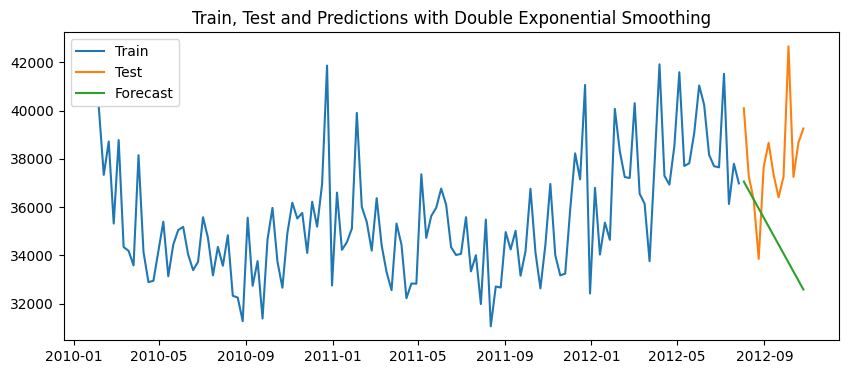

In [24]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [25]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 3401.39
The RMSE is 4145.71
The MAPE is 8.76 %


Holt-Winters multipliative seosonality

In [26]:
model = ExponentialSmoothing(train,
                             trend = 'add',
                             seasonal = "mul",
                             seasonal_periods = 52).fit()
predictions = model.forecast(13)
predictions.index = test.index

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


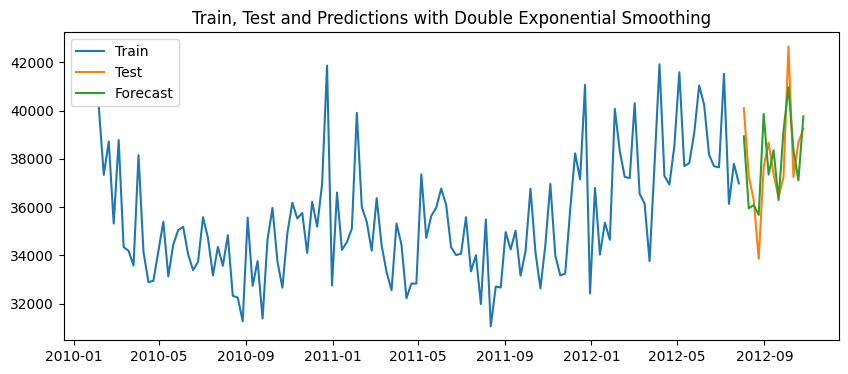

In [27]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [28]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1227.35
The RMSE is 1374.79
The MAPE is 3.24 %


Holt-Winters additive seosonality

In [29]:
model = ExponentialSmoothing(train,
                             trend = 'add',
                             seasonal = "add",
                             seasonal_periods = 52).fit()
predictions = model.forecast(13)
predictions.index = test.index

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


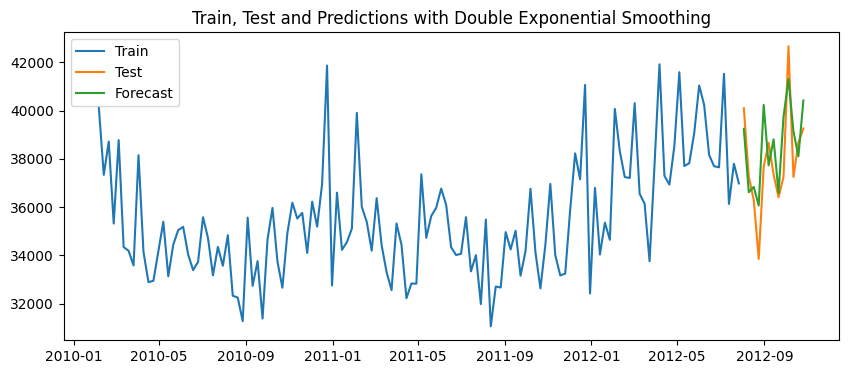

In [30]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [31]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1297.32
The RMSE is 1499.22
The MAPE is 3.45 %


# ARIMA Family

In [32]:
from pmdarima import auto_arima, ARIMA, model_selection

ARIMA

In [33]:
model = auto_arima(train, seasonal = False)
model.summary()

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -1176.031
Date:                Thu, 26 Jun 2025   AIC                           2362.063
Time:                        19:07:41   BIC                           2376.362
Sample:                    02-05-2010   HQIC                          2367.873
                         - 07-27-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6738      0.139     -4.864      0.000      -0.945      -0.402
ma.L1          0.3282      0.143      2.297      0.022       0.048       0.608
ma.L2         -0.3443      0.071     -4.852      0.000      -0.483      -0.205
ma.L3         -0.2509      0.032     -7.774      0.000      -0.314      -0.188
sigma2      3.993e+06   1.91e-08   2.09e+14      0.000    3.99e+06    3.99e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.98   Jarque-Bera (JB):                 7.41
Prob(Q):                              0.03   Prob(JB):                         0.02
Heteroskedasticity (H):               1.51   Skew:                            -0.01
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+30. Standard errors may be unstable.
"""

In [34]:
predictions = model.predict(13)

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


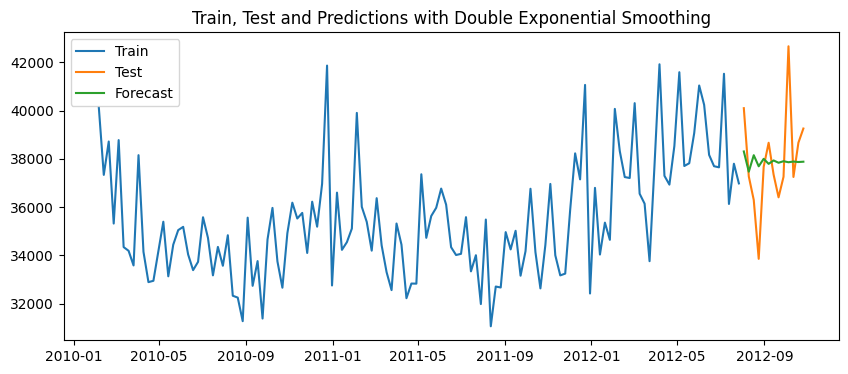

In [35]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [36]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1474.97
The RMSE is 1983.19
The MAPE is 3.88 %


SARIMA

In [37]:
model = auto_arima(train, m = 52)
model.summary()

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(3, 1, 1)x(2, 0, [], 52)   Log Likelihood               -1161.506
Date:                             Thu, 26 Jun 2025   AIC                           2337.012
Time:                                     19:13:26   BIC                           2357.031
Sample:                                 02-05-2010   HQIC                          2345.146
                                      - 07-27-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6401      0.226     -2.833      0.005      -1.083      -0.197
ar.L2         -0.1891      0.071     -2.658      0.008      -0.329      -0.050
ar.L3         -0.1903      0.053     -3.572      0.000      -0.295      -0.086
ma.L1          0.4105      0.235      1.750      0.080      -0.049       0.870
ar.S.L52       0.2378      0.052      4.531      0.000       0.135       0.341
ar.S.L104      0.1284      0.154      0.835      0.404      -0.173       0.430
sigma2      3.728e+06   3.97e+05      9.382      0.000    2.95e+06    4.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   7.81   Jarque-Bera (JB):                12.19
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.16
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.76e+14. Standard errors may be unstable.
"""

In [38]:
predictions = model.predict(13)

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


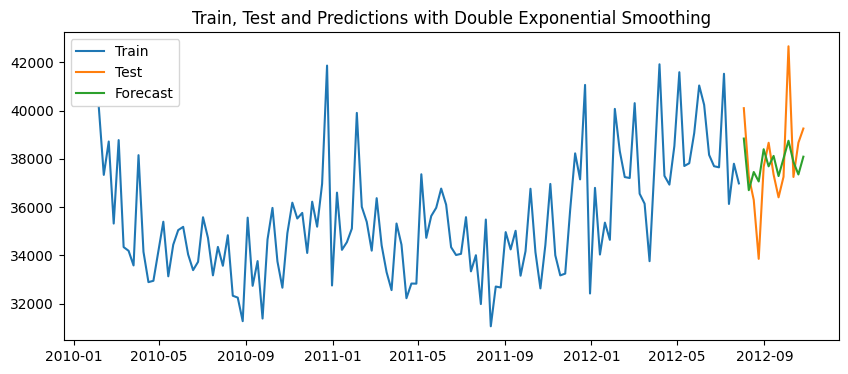

In [39]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [40]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1333.92
The RMSE is 1659.14
The MAPE is 3.51 %


SARIMAX

In [41]:
df.columns

Index(['IsHoliday', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Target'],
      dtype='object')

In [42]:
periods = int(len(df)-52*2.5) #predict next 13 week
exog_train, exog_test = df.iloc[:-periods,:][['IsHoliday', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']],\
                        df.iloc[-periods:, : ][['IsHoliday', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']]
exog_test.head()

,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,
2012-08-03,0,86.11,3.417,221.949864,6.908
2012-08-10,0,85.05,3.494,221.958433,6.908
2012-08-17,0,84.85,3.571,222.038411,6.908
2012-08-24,0,77.66,3.620,222.171946,6.908
2012-08-31,0,80.49,3.638,222.305480,6.908


In [55]:
model = auto_arima(train, m = 52, X = exog_train )
model.summary()

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood               -1133.463
Date:                             Thu, 26 Jun 2025   AIC                           2284.926
Time:                                     19:55:29   BIC                           2310.733
Sample:                                 02-05-2010   HQIC                          2295.412
                                      - 07-27-2012                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
IsHoliday    -1498.1186   1035.819     -1.446      0.148   -3528.286     532.049
Temperature    -64.5332     20.631     -3.128      0.002    -104.969     -24.098
Fuel_Price   -1254.4118    732.861     -1.712      0.087   -2690.793     181.970
CPI            278.8112     21.533     12.948      0.000     236.608     321.015
Unemployment -2114.6959    496.852     -4.256      0.000   -3088.507   -1140.884
ar.L1            0.8512      0.103      8.268      0.000       0.649       1.053
ma.L1           -0.5770      0.172     -3.348      0.001      -0.915      -0.239
ar.S.L52         0.7645      0.054     14.101      0.000       0.658       0.871
sigma2        1.529e+06   1.91e+05      8.019      0.000    1.16e+06     1.9e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                20.51
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
predictions = model.predict(13,X=exog_test)

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


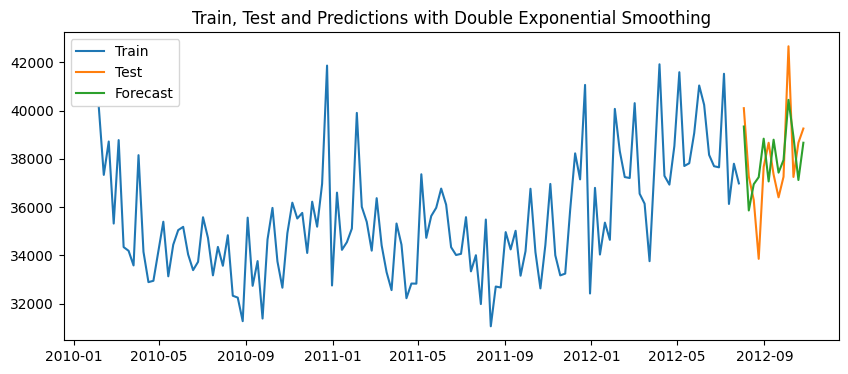

In [58]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [59]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1397.79
The RMSE is 1580.21
The MAPE is 3.73 %


# Machine Learning Regressors

Without Exogenous Variables

In [46]:
df.columns

Index(['IsHoliday', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Target'],
      dtype='object')

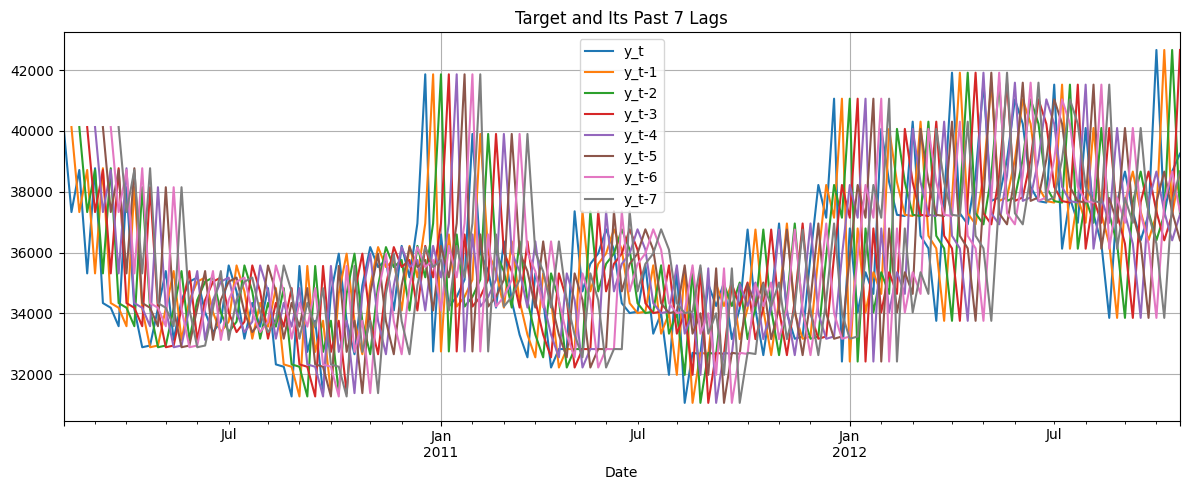

In [47]:
n_lags = 7 #choosen according to PACF
df['y_t'] = df['Target']
for i in range(1, n_lags + 1):
    df[f'y_t-{i}'] = df['Target'].shift(i)

# Plot lags
cols_to_plot = ['y_t'] + [f'y_t-{i}' for i in range(1, n_lags + 1)]
df[cols_to_plot].plot(figsize=(12, 5))
plt.title(f'Target and Its Past {n_lags} Lags')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
periods = int(len(df)-52*2.5) #predict next 13 week

df_lagged = df.dropna()

X = df_lagged[[f'y_t-{i}' for i in range(1, n_lags + 1)]]
y = df_lagged['y_t']

X_train, X_test = X[:-periods], X[-periods:]
y_train, y_test = y[:-periods], y[-periods:]

Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predictions = pd.Series(predictions, index = y_test.index)

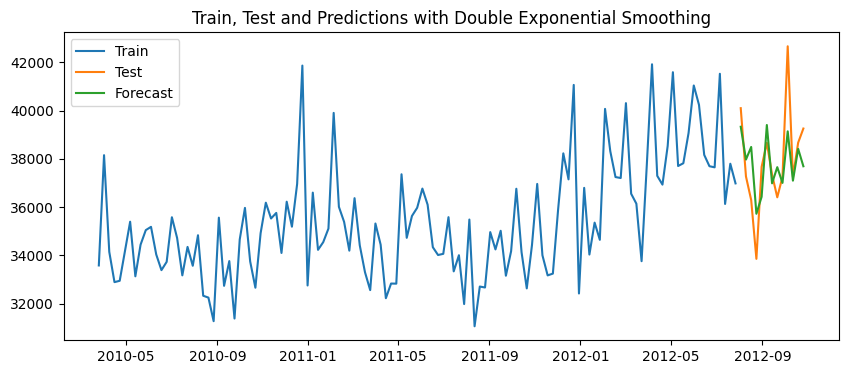

In [51]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [52]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1143.88
The RMSE is 1472.53
The MAPE is 3.00 %


In [54]:
import joblib
joblib.dump(rf, "random_forest_model.pkl")


['random_forest_model.pkl']

XGBoost

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)
gbr_predictions = pd.Series(gbr_predictions, index=y_test.index)

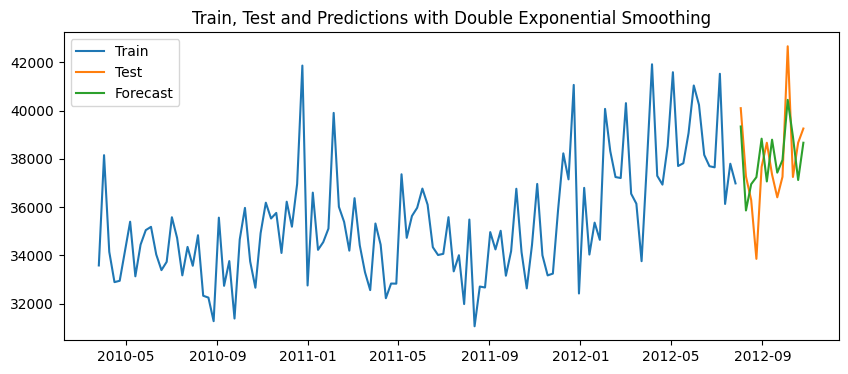

In [62]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [63]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1397.79
The RMSE is 1580.21
The MAPE is 3.73 %


With Exogenous Variables

In [64]:
# Define lag and external feature columns
lag_cols = [f'y_t-{i}' for i in range(1, n_lags + 1)]
exog_cols = ['IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Combine them into feature set
X = df_lagged[lag_cols + exog_cols]
y = df_lagged['y_t']

# Split into training and testing
X_train, X_test = X[:-periods], X[-periods:]
y_train, y_test = y[:-periods], y[-periods:]

Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predictions = pd.Series(predictions, index = y_test.index)

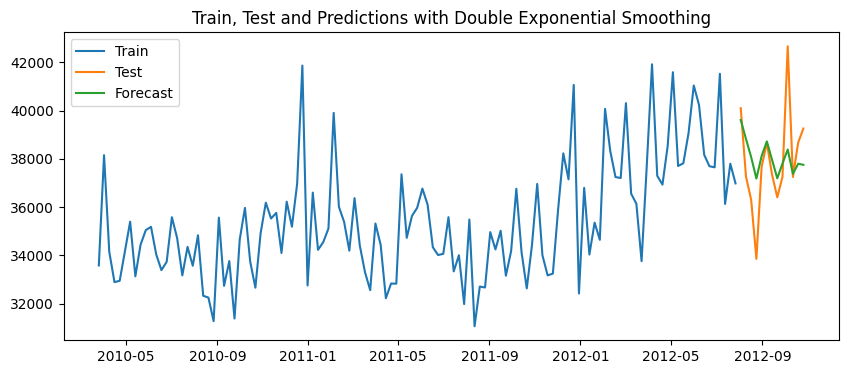

In [67]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [68]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1260.10
The RMSE is 1747.77
The MAPE is 3.32 %


XGBoost

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predictions = pd.Series(predictions, index = y_test.index)

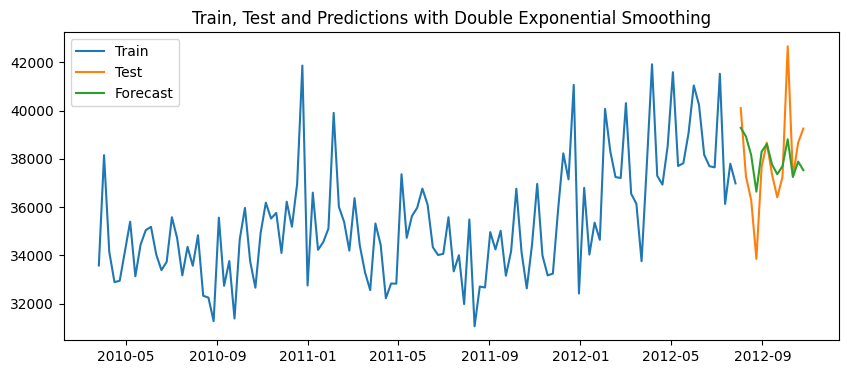

In [71]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [72]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1229.76
The RMSE is 1635.18
The MAPE is 3.23 %


# Deep Learning Models

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.layers import (
    Conv1D,
    Dense,
    GlobalMaxPooling1D,
    Input,
    MaxPooling1D,
)
from tensorflow.keras.models import Model
from tqdm.keras import TqdmCallback

np.random.seed(42)
tf.random.set_seed(42)

RNN

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [62]:
train_df = df.iloc[:-periods]
test_df = df.iloc[-periods:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Weekly_Sales']])
test_scaled = scaler.transform(test_df[['Weekly_Sales']])

full_scaled = np.concatenate([train_scaled, test_scaled])

In [63]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 40
X, y = create_sequences(full_scaled, n_steps)
print(X.shape, y.shape)

(103, 40, 1) (103, 1)


In [64]:
X_train, X_test = X[:-periods], X[-periods:]
y_train, y_test = y[:-periods], y[-periods:]
print(len(y_train),len(y_test))

90 13


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)  # single output
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0917 - val_loss: 0.0561
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0496 - val_loss: 0.0646
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0465 - val_loss: 0.0469
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0437 - val_loss: 0.0570
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0401 - val_loss: 0.0430
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - val_loss: 0.0468
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0368 - val_loss: 0.0402
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0363 - val_loss: 0.0394
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0348 - val_loss: 0.0363
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0341 - val_loss: 0.0331
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0326 - val_loss: 0.0307
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0320 - val_loss: 0.0281
E

In [67]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame(scaler.inverse_transform(y_pred), index=test_df.index, columns=['Weekly_Sales'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


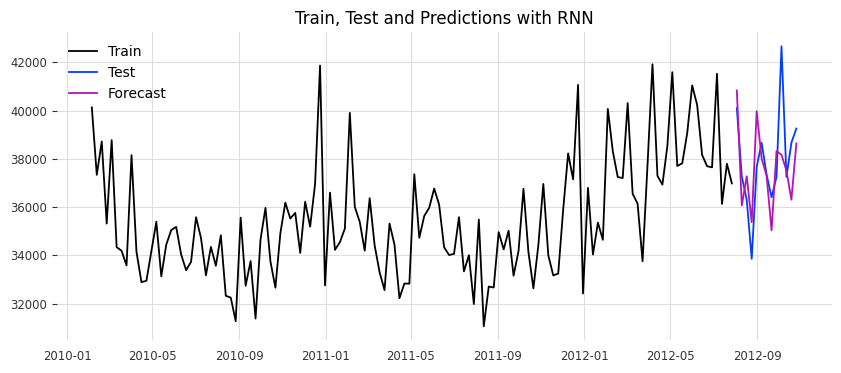

In [68]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df[["Weekly_Sales"]], label = 'Train')
plt.plot(test_df[["Weekly_Sales"]], label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with RNN")
plt.legend()
plt.show()

In [69]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(scaler.inverse_transform(y_test), predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1356.81
The RMSE is 1761.48
The MAPE is 3.52 %


In [ ]:
model.save("rnn_model.keras")

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("rnn_model.keras")


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("rnn_model.h5")


LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.1491 - val_loss: 0.1046
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0391 - val_loss: 0.0702
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0469 - val_loss: 0.0334
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0304 - val_loss: 0.0417
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0293 - val_loss: 0.0367
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0274 - val_loss: 0.0338
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0289 - val_loss: 0.0340
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0288 - val_loss: 0.0343
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0277 - val_loss: 0.0346
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0272 - val_loss: 0.0341
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0274 - val_loss: 0.0342
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0274 - val_loss: 0.0343
E

In [ ]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame(scaler.inverse_transform(y_pred), index=test_df.index, columns=['Weekly_Sales'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


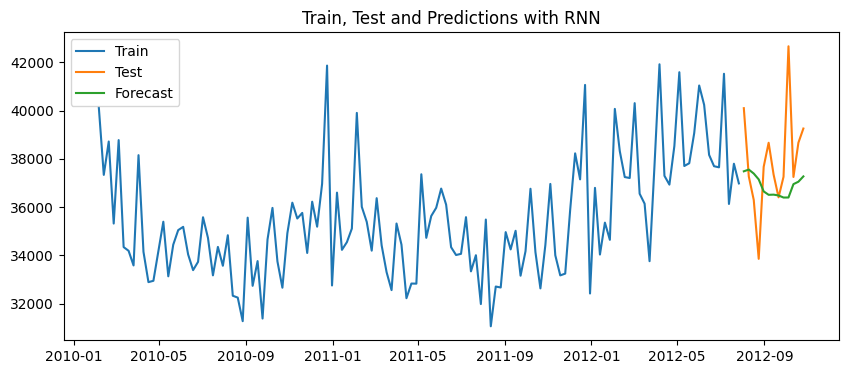

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df[["Weekly_Sales"]], label = 'Train')
plt.plot(test_df[["Weekly_Sales"]], label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with RNN")
plt.legend()
plt.show()

In [ ]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(scaler.inverse_transform(y_test), predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1492.07
The RMSE is 2080.97
The MAPE is 3.92 %


CNN

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 40
X, y = create_sequences(full_scaled, n_steps)
print(X.shape, y.shape)

(103, 40, 1) (103, 1)


In [ ]:
X_train, X_test = X[:-periods], X[-periods:]
y_train, y_test = y[:-periods], y[-periods:]
print(len(y_train),len(y_test))

90 13


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps, 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │        60,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,029 (238.39 KB)

 Trainable params: 61,029 (238.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0045 - val_loss: 0.0417
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0043 - val_loss: 0.0423
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0040 - val_loss: 0.0424
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0039 - val_loss: 0.0421
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0037 - val_loss: 0.0423
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035 - val_loss: 0.0425
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0033 - val_loss: 0.0435
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0032 - val_loss: 0.0434
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030 - val_loss: 0.0436
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029 - val_loss: 0.0436
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028 - val_loss: 0.0441
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - val_loss: 0.0447
E

In [ ]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame(scaler.inverse_transform(y_pred), index=test_df.index, columns=['Weekly_Sales'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


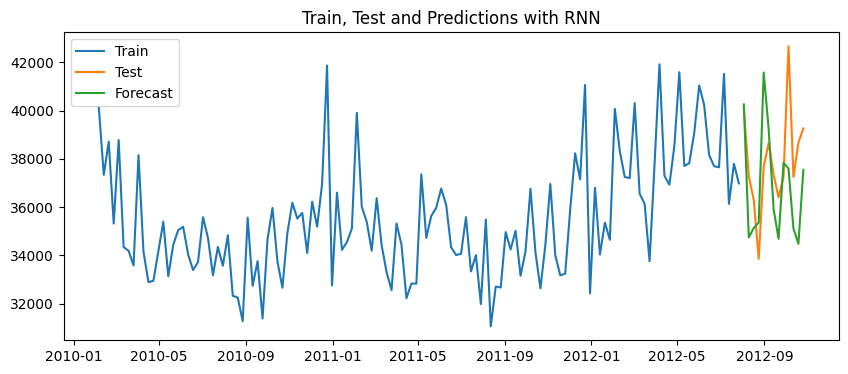

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df[["Weekly_Sales"]], label = 'Train')
plt.plot(test_df[["Weekly_Sales"]], label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with RNN")
plt.legend()
plt.show()

In [ ]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(scaler.inverse_transform(y_test), predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 2051.27
The RMSE is 2506.36
The MAPE is 5.35 %


ANN

In [47]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 40
X, y = create_sequences(full_scaled, n_steps)
print(X.shape, y.shape)

(103, 40, 1) (103, 1)


In [48]:
X_train, X_test = X[:-periods], X[-periods:]
y_train, y_test = y[:-periods], y[-periods:]
print(len(y_train),len(y_test))

90 13


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(n_steps,)),  # First hidden layer
    Dense(50, activation='relu'),                          # Second hidden layer
    Dense(1)                                                # Output layer
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,925 (23.14 KB)

 Trainable params: 5,925 (23.14 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.1076 - val_loss: 0.1198
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0844 - val_loss: 0.0549
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0483 - val_loss: 0.0447
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0434 - val_loss: 0.0359
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0375 - val_loss: 0.0463
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0382 - val_loss: 0.0360
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0326 - val_loss: 0.0314
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0299 - val_loss: 0.0313
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0285 - val_loss: 0.0318
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0272 - val_loss: 0.0285
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0249 - val_loss: 0.0276
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0235 - val_loss: 0.0280


In [51]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame(scaler.inverse_transform(y_pred), index=test_df.index, columns=['Weekly_Sales'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


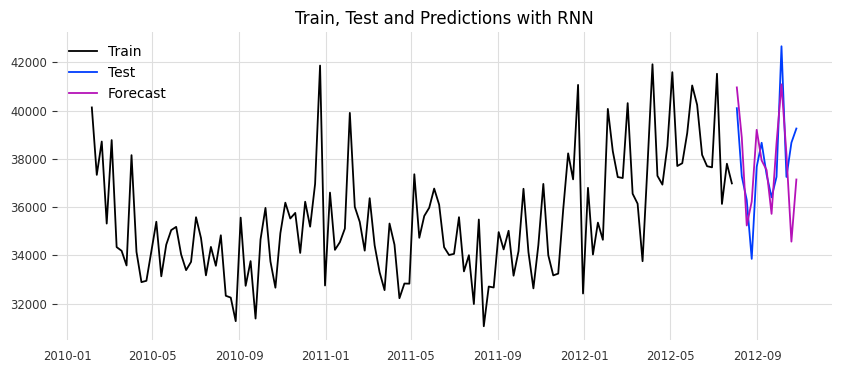

In [52]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df[["Weekly_Sales"]], label = 'Train')
plt.plot(test_df[["Weekly_Sales"]], label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with RNN")
plt.legend()
plt.show()

In [55]:
predictions.shape

(13, 1)

In [57]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(scaler.inverse_transform(y_test), predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1474.56
The RMSE is 1755.62
The MAPE is 3.90 %


# Prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df.copy()
df_prophet.reset_index(inplace=True)
df_prophet = df_prophet.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})
df_prophet.head()

,ds,IsHoliday,y,Temperature,Fuel_Price,CPI,Unemployment,Target
0,2010-02-05,0,40129.01,42.31,2.572,211.096358,8.106,40129.01
1,2010-02-12,1,37334.83,38.51,2.548,211.242170,8.106,37334.83
2,2010-02-19,0,38717.60,39.93,2.514,211.289143,8.106,38717.60
3,2010-02-26,0,35318.20,46.63,2.561,211.319643,8.106,35318.20
4,2010-03-05,0,38776.09,46.50,2.625,211.350143,8.106,38776.09


In [ ]:
df["IsHoliday"].value_counts() #consider the day but we work on weekly data so we will do holidays manually

,count
IsHoliday,
0,133
1,10


In [ ]:
df_prophet["ds"].min() , df_prophet["ds"].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df_prophet[df_prophet["IsHoliday"] == 1].index,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2010-12-24', '2011-12-24']),
                     'lower_window': -5,
                     'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2010-12-31', '2011-12-31']),
                     'lower_window': -3,
                     'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2010-04-04', '2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                     'upper_window': 3})

# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays.head()

,holiday,ds,lower_window,upper_window
0,gen_holi,1,-2,2
1,gen_holi,31,-2,2
2,gen_holi,42,-2,2
3,gen_holi,47,-2,2
4,gen_holi,53,-2,2


In [ ]:
holidays["holiday"].value_counts()

,count
holiday,
gen_holi,10
easter,3
christmas,2
new_years,2


In [ ]:
periods = int(len(df)-52*2.5) #predict next 13 week
train_prophet, test_prophet = df_prophet.iloc[:-periods,:][["ds", "Temperature", "Fuel_Price", "CPI",	"Unemployment", "y"]], df_prophet.iloc[-periods:, : ][["ds", "Temperature", "Fuel_Price", "CPI",	"Unemployment", "y"]]
test_prophet.head()

,ds,Temperature,Fuel_Price,CPI,Unemployment,y
130,2012-08-03,86.11,3.417,221.949864,6.908,40098.84
131,2012-08-10,85.05,3.494,221.958433,6.908,37269.92
132,2012-08-17,84.85,3.571,222.038411,6.908,36294.18
133,2012-08-24,77.66,3.620,222.171946,6.908,33855.28
134,2012-08-31,80.49,3.638,222.305480,6.908,37666.92


In [ ]:
from itertools import product

regressor_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode': ['additive', 'multiplicative']
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

# Track best
best_rmse = float('inf')
best_params = None

for params in all_params:
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        holidays=holidays,
        yearly_seasonality=True,
        weekly_seasonality=False
    )

    for reg in regressor_cols:
        model.add_regressor(reg)

    # Fit on training data
    model.fit(train_prophet)

    # Predict on test data
    future = test_prophet[['ds'] + regressor_cols]
    forecast = model.predict(future)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(test_prophet['y'], forecast['yhat']))
    print(f"Params: {params} => RMSE: {rmse:.2f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Final Output
print("\n✅ Best Params:")
print(best_params)
print(f"Lowest RMSE: {best_rmse:.2f}")


11:46:28 - cmdstanpy - INFO - Chain [1] start processing
11:46:28 - cmdstanpy - INFO - Chain [1] done processing
11:46:28 - cmdstanpy - INFO - Chain [1] start processing
11:46:28 - cmdstanpy - INFO - Chain [1] done processing
11:46:28 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'} => RMSE: 2031.16
Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'} => RMSE: 2101.95


11:46:28 - cmdstanpy - INFO - Chain [1] done processing
11:46:29 - cmdstanpy - INFO - Chain [1] start processing
11:46:29 - cmdstanpy - INFO - Chain [1] done processing
11:46:29 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive'} => RMSE: 2049.24
Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative'} => RMSE: 2095.21


11:46:29 - cmdstanpy - INFO - Chain [1] done processing
11:46:29 - cmdstanpy - INFO - Chain [1] start processing
11:46:29 - cmdstanpy - INFO - Chain [1] done processing
11:46:29 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'} => RMSE: 2029.45
Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'} => RMSE: 2093.35


11:46:29 - cmdstanpy - INFO - Chain [1] done processing
11:46:29 - cmdstanpy - INFO - Chain [1] start processing
11:46:29 - cmdstanpy - INFO - Chain [1] done processing
11:46:29 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive'} => RMSE: 2033.33
Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative'} => RMSE: 2099.88


11:46:29 - cmdstanpy - INFO - Chain [1] done processing
11:46:30 - cmdstanpy - INFO - Chain [1] start processing
11:46:30 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'} => RMSE: 2039.23
Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'} => RMSE: 1980.51


11:46:30 - cmdstanpy - INFO - Chain [1] start processing
11:46:30 - cmdstanpy - INFO - Chain [1] done processing
11:46:30 - cmdstanpy - INFO - Chain [1] start processing
11:46:30 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive'} => RMSE: 2051.40
Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative'} => RMSE: 1985.69


11:46:30 - cmdstanpy - INFO - Chain [1] start processing
11:46:30 - cmdstanpy - INFO - Chain [1] done processing
11:46:30 - cmdstanpy - INFO - Chain [1] start processing
11:46:30 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'} => RMSE: 2133.05
Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'} => RMSE: 1989.02


11:46:30 - cmdstanpy - INFO - Chain [1] start processing
11:46:30 - cmdstanpy - INFO - Chain [1] done processing
11:46:31 - cmdstanpy - INFO - Chain [1] start processing
11:46:31 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive'} => RMSE: 2027.47
Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative'} => RMSE: 1984.65

✅ Best Params:
{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}
Lowest RMSE: 1980.51


In [ ]:
#Forecast
future = test_prophet[['ds', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
forecast = model.predict(future)
predictions = forecast[['ds','yhat']].copy()
predictions.head()

,ds,yhat
0,2012-08-03,37183.008062
1,2012-08-10,36991.005053
2,2012-08-17,37149.028228
3,2012-08-24,38055.040748
4,2012-08-31,38075.099892


In [ ]:
predictions_   = predictions.rename(columns={'ds': 'Date'}).set_index('Date')
test_prophet_  = test_prophet.rename(columns={'ds': 'Date'}).set_index('Date')[["y"]]
train_prophet_ = train_prophet.rename(columns={'ds': 'Date'}).set_index('Date')[["y"]]

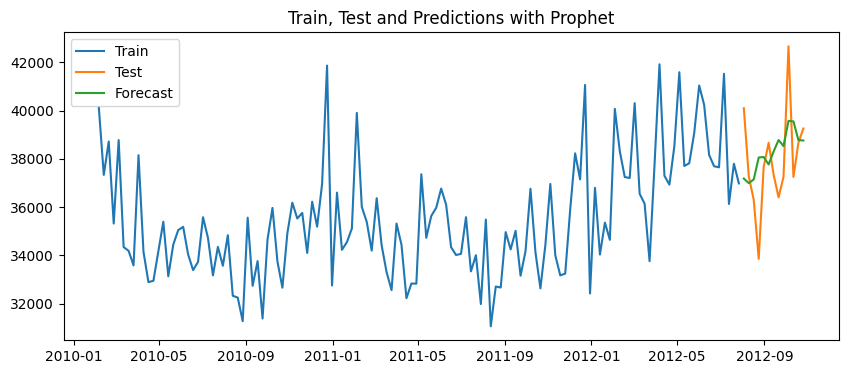

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_prophet_, label = 'Train')
plt.plot(test_prophet_, label = 'Test')
plt.plot(predictions_, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Prophet")
plt.legend()
plt.show()

In [ ]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test_prophet_, predictions_)
rmse = sqrt(mean_squared_error(test_prophet_, predictions_))
mape = mean_absolute_percentage_error(test_prophet_, predictions_)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1550.64
The RMSE is 1984.65
The MAPE is 4.13 %


# Innovative Technique
# N-BEATS

In [23]:
!pip install u8darts[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
import pandas as pd
from darts import TimeSeries

series = TimeSeries.from_series(df['Weekly_Sales'])
past_covariates = TimeSeries.from_dataframe(
    df,
    value_cols=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
)

In [26]:
periods = 13
train, test = series[:-periods], series[-periods:]
past_covariates_train, past_covariates_test = past_covariates[:-periods], past_covariates[-periods:]

In [27]:
from darts.models import NBEATSModel

model = NBEATSModel(
    input_chunk_length=52,   # e.g., 1 year of weekly data
    output_chunk_length=13,  # forecast next 13 weeks
    n_epochs=100,
    random_state=42
)

model.fit(train, past_covariates=past_covariates_train, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 8.1 M  | train
-------------------------------------------------------------
8.1 M     Trainable params
2.8 K     Non-trainable params
8.1 M     Total params
32.245    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=52, output_chunk_length=13, n_epochs=100, random_state=42)

In [28]:
forecast = model.predict(n=13)  # Predict next 13 time steps

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [38]:
train_df = df.iloc[:-periods][["Weekly_Sales"]]
test_df = df.iloc[-periods:][["Weekly_Sales"]]
predictions = forecast.to_dataframe()
predictions.set_index(test_df.index, inplace=True)

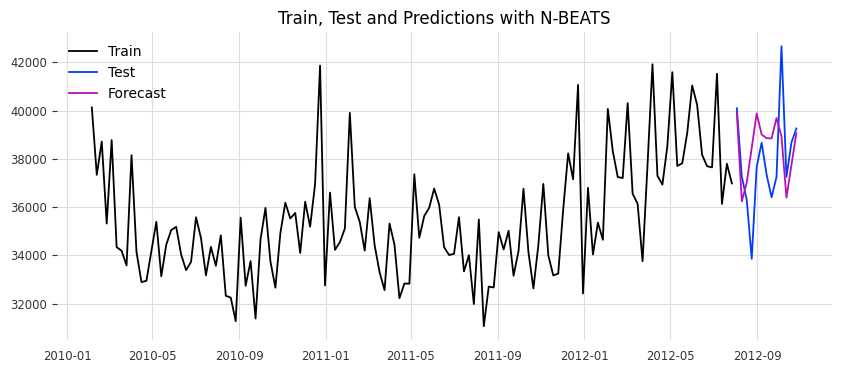

In [39]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df, label = 'Train')
plt.plot(test_df, label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with N-BEATS")
plt.legend()
plt.show()

In [43]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test_df, predictions)
rmse = sqrt(mean_squared_error(test_df, predictions))
mape = mean_absolute_percentage_error(test_df, predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1630.09
The RMSE is 2103.72
The MAPE is 4.37 %


In [59]:
import tensorflow
tensorflow.__version__

'2.18.0'

# Multi-Step and Multi-output using RNN (best model)

Multi-Step

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [78]:
train_df = df.iloc[:-periods]
test_df = df.iloc[-periods:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Weekly_Sales']])
test_scaled = scaler.transform(test_df[['Weekly_Sales']])

full_scaled = np.concatenate([train_scaled, test_scaled])

In [79]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 40
X, y = create_sequences(full_scaled, n_steps)
print(X.shape, y.shape)

(103, 40, 1) (103, 1)


In [80]:
X_train, X_test = X[:-periods], X[-periods:]
y_train, y_test = y[:-periods], y[-periods:]
print(len(y_train),len(y_test))

90 13


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)  # single output
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.1794 - val_loss: 0.0352
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1578 - val_loss: 0.0323
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0916 - val_loss: 0.0858
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0744 - val_loss: 0.1071
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0723 - val_loss: 0.0625
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0576 - val_loss: 0.0388
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0562 - val_loss: 0.0397
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0500 - val_loss: 0.0506
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0466 - val_loss: 0.0500
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0441 - val_loss: 0.0390
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0417 - val_loss: 0.0353
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0395 - val_loss: 0.0366
E

In [83]:
n_steps = 40
n_forecast = periods
input_seq = train_scaled[-n_steps:].reshape(1, n_steps, 1)

multi_step_preds = []

for _ in range(n_forecast):
    yhat = model.predict(input_seq)[0, 0]
    multi_step_preds.append(yhat)
    input_seq = np.append(input_seq[:,1:,:], [[[yhat]]], axis=1)

multi_step_preds = scaler.inverse_transform(np.array(multi_step_preds).reshape(-1, 1))
predictions = pd.DataFrame(multi_step_preds, index=test_df.index, columns=['Weekly_Sales'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


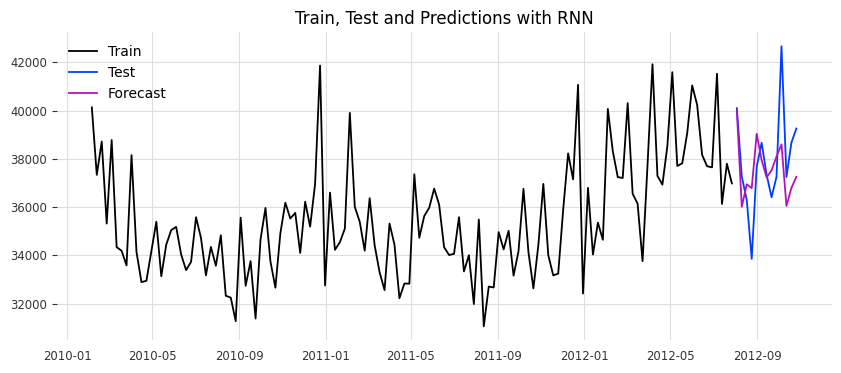

In [84]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df[["Weekly_Sales"]], label = 'Train')
plt.plot(test_df[["Weekly_Sales"]], label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with RNN")
plt.legend()
plt.show()

In [85]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(scaler.inverse_transform(y_test), predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1404.06
The RMSE is 1764.03
The MAPE is 3.69 %


Multi-Output

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [74]:
train_df = df.iloc[:-periods]
test_df = df.iloc[-periods:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Weekly_Sales']])
test_scaled = scaler.transform(test_df[['Weekly_Sales']])

full_scaled = np.concatenate([train_scaled, test_scaled])

In [75]:
def create_multioutput_sequences(data, n_steps, n_outputs):
    X, y = [], []
    for i in range(n_steps, len(data) - n_outputs + 1):
        X.append(data[i - n_steps:i])
        y.append(data[i:i + n_outputs])  # next 13 points as target
    return np.array(X), np.array(y)

n_steps = 40
n_outputs = 13

X, y = create_multioutput_sequences(full_scaled, n_steps, n_outputs)
print(X.shape, y.shape)

(91, 40, 1) (91, 13, 1)


In [76]:
X_train, X_test = X[:-1,:,:], X[-1:,:,:]
y_train, y_test = y[:-1,:,:], y[-1:,:,:]
print(y_train.shape,y_test.shape)

(90, 13, 1) (1, 13, 1)


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(n_outputs)  # output 13 values at once
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 13)             │           663 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,263 (12.75 KB)

 Trainable params: 3,263 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.2267 - val_loss: 0.2226
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1355 - val_loss: 0.1367
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0937 - val_loss: 0.0857
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0696 - val_loss: 0.0594
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0593 - val_loss: 0.0393
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0520 - val_loss: 0.0325
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0501 - val_loss: 0.0330
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0463 - val_loss: 0.0353
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0454 - val_loss: 0.0398
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0445 - val_loss: 0.0362
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0435 - val_loss: 0.0356
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0443 - val_loss: 0.0358
E

In [79]:
yhat = model.predict(X_test)  # shape: (1, 13)
multi_output_preds = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))
predictions = pd.DataFrame(multi_output_preds, index=test_df.index, columns=['Weekly_Sales'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


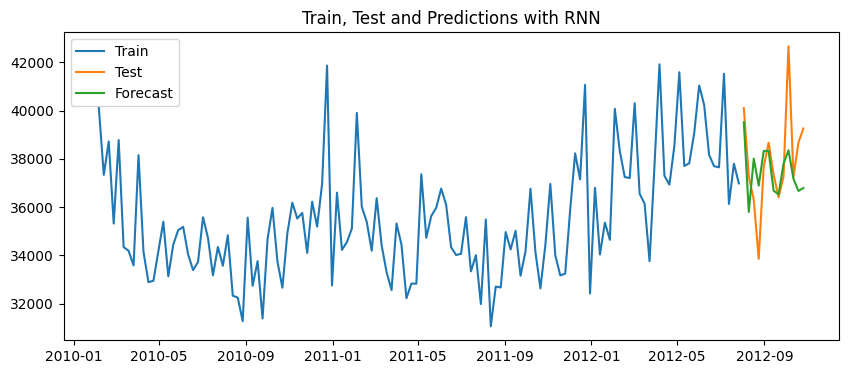

In [80]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df[["Weekly_Sales"]], label = 'Train')
plt.plot(test_df[["Weekly_Sales"]], label = 'Test')
plt.plot(predictions, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with RNN")
plt.legend()
plt.show()

In [83]:
y_test.shape

(1, 13, 1)

In [85]:
# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(scaler.inverse_transform(y_test[0,:,:]), predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test[0,:,:]), predictions))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test[0,:,:]), predictions)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 1382.43
The RMSE is 1851.51
The MAPE is 3.62 %
